# DCGAN - Multi-class Classification (Type 0 - 4) on GAN Images - Diabetic Retinopathy

In [1]:
import os
import random
import matplotlib
import numpy as np
import pandas as pd
from PIL import Image
from tqdm import tqdm
from sklearn import metrics
import matplotlib.pyplot as plt
from keras.utils import np_utils
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.models import load_model
from keras.preprocessing import image
from keras.optimizers import SGD,RMSprop,adam
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [3]:
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [4]:
listing = os.listdir("dataset/generated_images/GAN/")

## Data Loader

In [5]:
img_rows, img_cols = 200, 200

In [6]:
immatrix = []
imlabel = []

with tqdm(listing) as pbar:
    for file in listing:
        base = os.path.basename("dataset/generated_images/GAN/" + file)
        fileName = os.path.splitext(base)[0]
        imlabel.append(file[0][0])
        im = Image.open("dataset/generated_images/GAN/" + file)   
        img = im.resize((img_rows,img_cols))
        gray = img.convert('L')
        immatrix.append(np.array(gray).flatten())
        pbar.update(1)

immatrix = np.asarray(immatrix)
imlabel = np.asarray(imlabel)

100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:20<00:00, 238.39it/s]


In [7]:
np.save('immatrix_GAN', immatrix)
np.save('imlabel__GAN', imlabel)

In [8]:
immatrix = np.load('immatrix_GAN.npy')
imlabel = np.load('imlabel__GAN.npy')

## Data Preprocessing

In [9]:
data,Label = shuffle(immatrix,imlabel, random_state=2)
train_data = [data,Label]

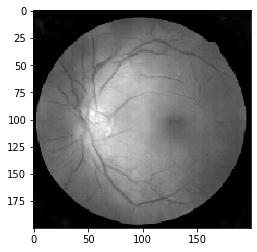

In [10]:
img=immatrix[167].reshape(img_rows,img_cols)
plt.imshow(img)
plt.imshow(img,cmap='gray')

In [11]:
batch_size = 4
nb_classes = 5
nb_epoch = 20
nb_filters = 32
nb_pool = 2
nb_conv = 3

(X, y) = (train_data[0],train_data[1])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4)

print(X_train.shape)
print(X_test.shape)

X_train = X_train.reshape(X_train.shape[0], img_cols, img_rows, 1)
X_test = X_test.reshape(X_test.shape[0], img_cols, img_rows, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

(4500, 40000)
(500, 40000)
X_train shape: (4500, 200, 200, 1)
4500 train samples
500 test samples


In [13]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

## CNN Model Definition

In [14]:
model = Sequential()

model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        border_mode='valid',
                        input_shape=(img_cols, img_rows, 1)))
convout1 = Activation('relu')
model.add(convout1)
model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
convout2 = Activation('relu')
model.add(convout2)
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\agarw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(200, 200,..., padding="valid")`
  """
C:\Users\agarw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  


In [15]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 198, 198, 32)      320       
_________________________________________________________________
activation_1 (Activation)    (None, 198, 198, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 196, 196, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 196, 196, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 98, 98, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 98, 98, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 307328)           

### Data Augmentation

In [16]:
validationdatagenerator = ImageDataGenerator()
traindatagenerator = ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,rotation_range=15,zoom_range=0.1 )

train_generator=traindatagenerator.flow(X_train, Y_train, batch_size=batch_size) 
validation_generator=validationdatagenerator.flow(X_test, Y_test,batch_size=batch_size)

## Training

In [17]:
history = model.fit_generator(train_generator, verbose=1, steps_per_epoch=int(len(X_train)/batch_size), epochs=nb_epoch, validation_data=validation_generator, validation_steps=int(len(X_test)/batch_size))

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
1125/1125 [==============================] - 116s 103ms/step - loss: 1.3779 - accuracy: 0.4202 - val_loss: 0.2093 - val_accuracy: 0.9420
Epoch 2/20
1125/1125 [==============================] - 119s 106ms/step - loss: 0.7610 - accuracy: 0.7384 - val_loss: 0.1231 - val_accuracy: 0.9620
Epoch 3/20
1125/1125 [==============================] - 119s 106ms/step - loss: 0.5850 - accuracy: 0.8029 - val_loss: 0.0396 - val_accuracy: 0.9780
Epoch 4/20
1125/1125 [==============================] - 119s 106ms/step - loss: 0.4698 - accuracy: 0.8476 - val_loss: 0.0012 - val_accuracy: 0.9520
Epoch 5/20
1125/1125 [==============================] - 119s 106ms/step - loss: 0.4176 - accuracy: 0.8676 - val_loss: 0.0986 - val_accuracy: 0.9860
Epoch 6/20
1125/1125 [==============================] - 119s 106ms/step - loss: 0.3432 - accuracy: 0.8858 - val_loss: 3.6633e-04 - val_accuracy: 0.9480
Epoch 7/20
1125/1125 [==============================] - 119s

In [18]:
model.save("model_4_20_GAN.h5")
print("Saved model to disk")

Saved model to disk


### Training Loss Plot

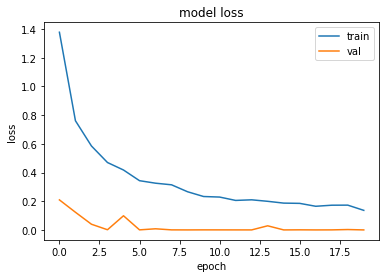

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

### Training Accuracy Plot

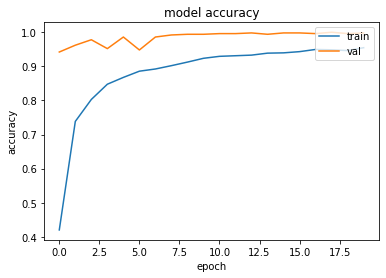

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

## Evaluation - Model Loss & Accuracy

In [21]:
scores = model.evaluate(X_test, Y_test)
print(scores)

500/500 [==============================] - 1s 2ms/step
[0.0075536190748971424, 0.9980000257492065]


### Confusion Matrix

In [22]:
y_pred = model.predict(X_test, verbose=1)

500/500 [==============================] - 1s 1ms/step


In [23]:
metrics.confusion_matrix(Y_test.argmax(axis=-1), y_pred.argmax(axis=-1))

array([[ 92,   0,   0,   0,   0],
       [  0,  99,   0,   0,   0],
       [  0,   0, 107,   0,   0],
       [  1,   0,   0, 100,   0],
       [  0,   0,   0,   0, 101]], dtype=int64)

### Accuracy

In [24]:
print("Accuracy: ", np.mean(Y_test.argmax(axis=-1) == y_pred.argmax(axis=-1)) * 100)

Accuracy:  99.8


### Precision, Recall & F1 Score - Classification Report

In [25]:
print(metrics.classification_report(y_pred.argmax(axis=-1), Y_test.argmax(axis=-1)))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        93
           1       1.00      1.00      1.00        99
           2       1.00      1.00      1.00       107
           3       0.99      1.00      1.00       100
           4       1.00      1.00      1.00       101

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



## Testing on Original Data

### Test Data Loader

In [27]:
test_listing = os.listdir("dataset/train_data/train/")

In [ ]:
test_immatrix = []
test_imlabel = []

with tqdm(listing) as pbar:
    for file in listing:
        base = os.path.basename("dataset/train_data/train/" + file)
        fileName = os.path.splitext(base)[0]
        test_imlabel.append(trainLabels.loc[trainLabels.image==fileName, 'level'].values[0])
        im = Image.open("dataset/train_data/train/" + file)   
        img = im.resize((img_rows,img_cols))
        gray = img.convert('L')
        test_immatrix.append(np.array(gray).flatten())
        pbar.update(1)

test_immatrix = np.asarray(test_immatrix)
test_imlabel = np.asarray(test_imlabel)

In [ ]:
np.save('immatrix_1', test_immatrix)
np.save('imlabel_1', test_imlabel)

In [29]:
test_immatrix = np.load('immatrix_1.npy')
test_imlabel = np.load('imlabel_1.npy')

### Test Data Preprocessing

In [30]:
data,Label = shuffle(test_immatrix,test_imlabel, random_state=2)
data,Label = shuffle(data,Label, random_state=2)

test_data = [data,Label]

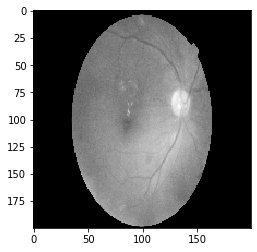

In [31]:
img = test_immatrix[1400].reshape(img_rows,img_cols)
plt.imshow(img)
plt.imshow(img,cmap='gray')

In [32]:
(X_test_orig, y_test_orig) = (test_data[0],test_data[1])

In [33]:
X_test_orig = X_test_orig.reshape(X_test_orig.shape[0], img_cols, img_rows, 1)

X_test_orig = X_test_orig.astype('float32')

X_test_orig /= 255

print(X_test_orig.shape[0], 'test samples')

3500 test samples


In [34]:
Y_test_orig = np_utils.to_categorical(y_test_orig, nb_classes)

### Evaluation - Model Loss & Accuracy

In [35]:
scores = model.evaluate(X_test_orig, Y_test_orig)
print(scores)

3500/3500 [==============================] - 4s 1ms/step
[7.756624386378697, 0.23571428656578064]


### Confusion Matrix

In [36]:
y_pred_orig = model.predict(X_test_orig, verbose=1)

3500/3500 [==============================] - 4s 1ms/step


In [37]:
metrics.confusion_matrix(Y_test_orig.argmax(axis=-1), y_pred_orig.argmax(axis=-1))

array([[171,   8, 231,  86, 204],
       [148,  36, 260, 158,  98],
       [155,   9, 218, 135, 183],
       [176,  11, 189, 214, 110],
       [ 99,   5, 169, 241, 186]], dtype=int64)

### Accuracy

In [38]:
print("Accuracy: ", np.mean(Y_test_orig.argmax(axis=-1) == y_pred_orig.argmax(axis=-1)) * 100)

Accuracy:  23.57142857142857


### Precision, Recall & F1 Score - Classification Report

In [39]:
print(metrics.classification_report(y_pred_orig.argmax(axis=-1), Y_test_orig.argmax(axis=-1)))

              precision    recall  f1-score   support

           0       0.24      0.23      0.24       749
           1       0.05      0.52      0.09        69
           2       0.31      0.20      0.25      1067
           3       0.31      0.26      0.28       834
           4       0.27      0.24      0.25       781

    accuracy                           0.24      3500
   macro avg       0.24      0.29      0.22      3500
weighted avg       0.28      0.24      0.25      3500

